# Hipotezy statystyczne i test Z
##### **Standardowy schemat postępowania**
 - **Krok 1** - zdefiniowanie hipotez zerowej i alternatywnej
 - **Krok 2** - Identyfikacja statystyki testu i obliczenie jej wartości
 - **Krok 3** - Wybór poziomu istotności $\alpha$
 - **Krok 4** - Sformułowanie reguły decyzyjnej: określenie obszarów krytycznych i zasad odrzucenia hipotezy zerowej
 - **Krok 5** - Przyjęcie decyzji
##### **Hipoteza statystyczna** to założenie/przypuszczenie które sprawdzamy czy jest prawdziwe. <br>
Mamy dwa rodzaje hipotez: <br>
- **$H_0$ - hipoteza zerowa**. $H_0: \theta = \theta_0$ <br>
- **$H_1$ - hipoteza alternatywna**. Dla testów jednostronnych: $H_1: \theta \neq \theta_0$, dla testów dwustronnych: $H_1: \theta \leq \theta_0$ lub $H_1: \theta \geq \theta_0$ <br> <br>
##### Załóżmy zatem że mamy podejrzenie że klocki hamulcowe z pewnej fabryki są chudsze niż powinny być. <br>
Wtedy możemy zrobić następujące hipotezy: <br>
- $H_0: \mu = 5$ - specyfikacja klocków podaje wymiary 5mm <br>
- $H_1: \mu < 5$ - klocki są chudsze niż powinny być. Test jednostronny ponieważ mamy przypuszczenie że są chudsze niż w specyfikacji<br>
##### **Statystyka testowa**
**Statystyka testowa** - zmienna, która jest wykorzystywana do sprawdzenia czy hipoteza zerowa jest prawdziwa. <br>
W podanym przykładzie naszą statystyką testową będzie średnia z próby. <br>
##### **Poziom istotności**
Poziom istotności $\alpha$ to prawdopodobieństwo popełnienia błędu pierwszego rodzaju. <br>
Standardowo przyjmuje się $\alpha = 0.05$ lub $\alpha = 0.01$ <br>
Dla naszego testu przyjmiemy $\alpha = 0.05$ <br>

In [2]:
alpha = 0.05
p0 = 5
n = 100
smpl = runif(n, 4.7, 5)
p_hat = mean(smpl)
p_hat

[1] 4.864055

##### **Testowanie Hipotezy**
Statystyka testowa $\bar{X}$ ma przy założeniu prawdziwości $H_0$ rozkład normalny o średniej $\theta_0$ i odchyleniu standardowym $\sigma/\sqrt{n}$ <br>
Załóżmy że odchylenie standardowe $\sigma$ jest znane i wynosi 0.05 <br>
Zamiast bezpośredniej statystyki posługujemy się wersją standaryzowaną 
$$Z = \frac{\bar{X} - \theta_0}{\sigma/\sqrt{n}}$$
##### Policzmy zatem ile wynosi $Z$ dla naszego przykładu <br>

In [3]:
z = (p_hat - p0) / (0.5 / sqrt(n))
z

[1] -2.718908

##### Wyznaczmy przedziały krytyczne 

In [4]:
z_crit = qnorm(alpha)
z_crit

[1] -1.644854

##### Podjęcie decyzji czy odrzucić hipotezę zerową

[1] FALSE

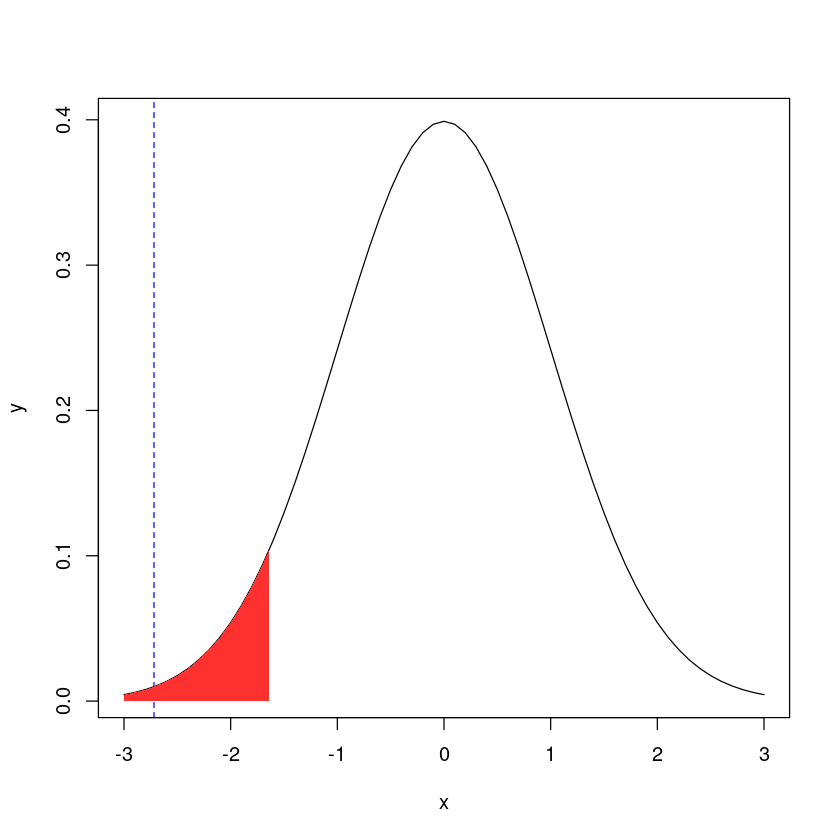

In [5]:
z_crit < z
plot_norm  <- function(z, z_crit) {
    x_max  <- max(3, abs(z))
    x  <- seq(-x_max, x_max, 0.1)
    y  <- dnorm(x)
    plot(x, y, type="l")
    abline(v = z, col="blue", lty=2)
    for (zc in z_crit) {
        if (zc > 0) {
            x_c  <- c(zc, zc, x[x > zc], max(x))
            y_c  <- c(0, dnorm(zc), y[x > zc], 0) 
        } else {
            x_c  <- c(min(x), x[x < zc], zc, zc)
            y_c  <- c(0, y[x < zc], dnorm(zc), 0)             
        }
        polygon(x_c, y_c, border=NA, col="firebrick1")
    }
}
plot_norm(z, z_crit)

##### Przykład kiedy nie odrzucamy hipotezy zerowej

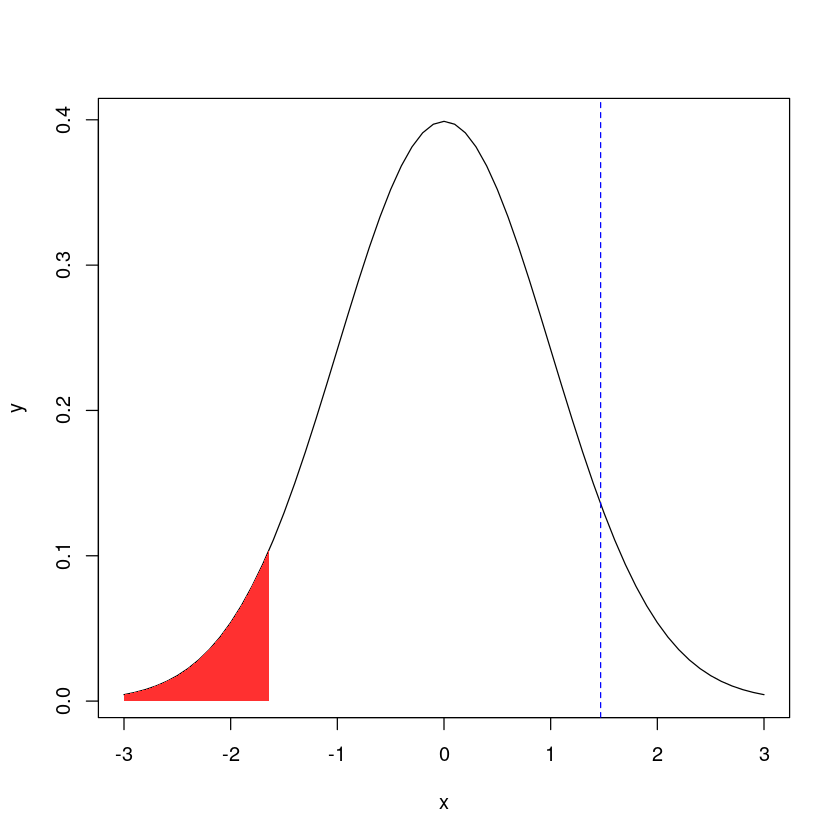

In [6]:
alpha = 0.05
p0 = 5
n = 100
smpl = rnorm(n, 5, 0.5)
p_hat = mean(smpl)
z = (p_hat - p0) / (0.5 / sqrt(n))
z_crit = qnorm(alpha)
plot_norm(z, z_crit)

##### Błędy
|                 | Odrzucamy        | Nieodrzucamy     |
|-----------------|------------------|------------------|
| $H_0$ prawdziwa | Błąd I rodzaju   | Właściwa decyzja |
| $H_0$ fałszywa  | Właściwa decyzja | Błąd II rodzaju  |

**Błąd I rodzaju $\alpha$** - odrzucenie prawdziwej hipotezy zerowej <br>
**Błąd II rodzaju $\beta$** - nieodrzucenie fałszywej hipotezy zerowej <br>
**Moc testu $\beta$** - prawdopodobieństwo nieodrzucenia fałszywej hipotezy zerowej <br>
**Poziom istotności $\alpha$** - prawdopodobieństwo popełnienia błędu pierwszego rodzaju. Wybór alphy jest zależny od badacza oraz natury ptoblemu <br>
**Błędy są ze sobą powiązane. Zmniejszająć prawdopodobieństwo popełnienia błedu pierwszego rodzaju zwiększamy prawdopodobieństwo błedu drugiego rodzaju**